In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
train_data = pd.read_csv('House Dataset/train (1).csv')
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df_train = train_data.copy()
df_train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [4]:
df_train.isnull().sum().sort_values(ascending = False).head(10)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
dtype: int64

In [5]:
# dp = pd.DataFrame(df_train)
# duplicates = dp[dp.duplicated()]
# print ('Duplicate rows:')
# print(duplicates)

df_train.duplicated().any()

False

In [6]:
# write a function that calculates the number of missing values in  dataframeframe
def cleandata(dataframe):
    for i in dataframe.columns:
        if (dataframe[i].isnull().sum() / dataframe.shape[0]) * 100 >= 30:
            dataframe.drop([i], axis = 1, inplace = True)
        elif dataframe[i].dtypes =='O':
            dataframe[i].fillna(dataframe[i].mode()[0], inplace = True)
        elif dataframe[i].dtypes == 'float' or dataframe[i].dtype == 'int':
            dataframe[i].fillna(dataframe[i].median(), inplace = True)

cleandata(df_train)
df_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [7]:
cat = df_train.select_dtypes(include = ['object', 'category']).columns
num = df_train.select_dtypes(include = 'number').columns
# display(cat.head())
# display(num.head())

In [8]:
#------------ standard scale and label encode-----------

def transform(dataframe):
    # scale the numerical columns
    removeY = dataframe.drop(['SalePrice'], axis = 1)
    for i in removeY.columns: 
        if i in dataframe.select_dtypes(include = 'number').columns: 
            dataframe[[i]] = scaler.fit_transform(dataframe[[i]])
    # label encode the categorical columns
    for i in dataframe.columns:
        if i in dataframe.select_dtypes(include = ['object', 'category']).columns:
            dataframe[i] = lb.fit_transform(dataframe[i])
    return dataframe

transform(df_train)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-1.730865,0.073375,3,-0.220875,-0.207142,1,3,3,0,4,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,8,4,208500
1,-1.728492,-0.872563,3,0.460320,-0.091886,1,3,3,0,2,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,8,4,181500
2,-1.726120,0.073375,3,-0.084636,0.073480,1,0,3,0,4,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,8,4,223500
3,-1.723747,0.309859,3,-0.447940,-0.096897,1,0,3,0,0,...,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,8,0,140000
4,-1.721374,0.073375,3,0.641972,0.375148,1,0,3,0,2,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,8,4,250000


FEATURES SELECTION

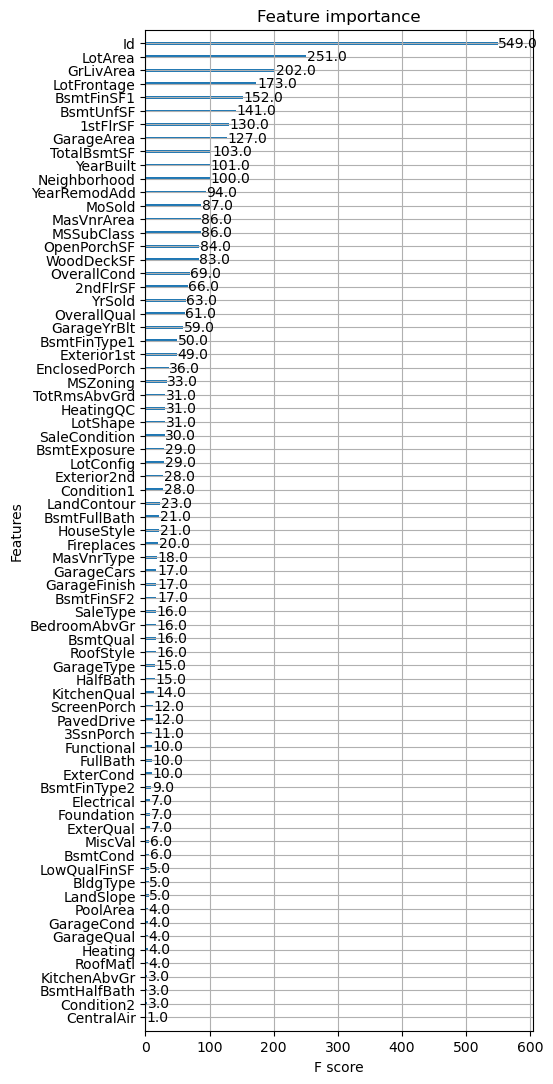

In [9]:
import xgboost as xgb
x = df_train.drop('SalePrice', axis = 1) 
y = df_train.SalePrice

Trmodel = xgb.XGBRegressor()
Trmodel.fit(x, y)

# Print feature importance scores
plt.rcParams['figure.figsize'] = (5, 13)  # Adjust the width and height as needed

# Create the feature importance plot
xgb.plot_importance(Trmodel, importance_type='weight')  # You can also use 'gain' or 'cover' for importance_type
plt.show()

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
best_feature1 = SelectKBest(score_func = f_classif, k = 'all')
fitting1 = best_feature1.fit(x,y)
scores1 = pd.DataFrame(fitting1.scores_)
columns1 = pd.DataFrame(x.columns)
feat_score1 = pd.concat([columns1, scores1], axis = 1)
feat_score1.columns = ['Feature', 'F_classif_score']
k1 = feat_score1.nlargest(11, 'F_classif_score')

k1.sort_values(by = 'F_classif_score', ascending = False)

,Feature,F_classif_score
16,OverallQual,5.729183
26,ExterQual,3.774880
70,MiscVal,3.756250
45,GrLivArea,3.435110
4,LotArea,3.285852
29,BsmtQual,3.011938
52,KitchenQual,2.904745
59,GarageCars,2.861594
48,FullBath,2.678847
60,GarageArea,2.583341


In [11]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [50]:
select_cols = ['LotArea', 'OverallQual', 'GrLivArea', 'ExterQual', 'LotFrontage', 'MiscVal', 'BsmtFinSF1',
                'BsmtUnfSF', '1stFlrSF', 'GarageArea', 'BsmtQual', 'TotalBsmtSF', 'YearBuilt', 'Neighborhood']

x = df_train[select_cols]
y = df_train.SalePrice

In [51]:
x

,LotArea,OverallQual,GrLivArea,ExterQual,LotFrontage,MiscVal,BsmtFinSF1,BsmtUnfSF,1stFlrSF,GarageArea,BsmtQual,TotalBsmtSF,YearBuilt,Neighborhood
0,-0.207142,0.651479,0.370333,2,-0.220875,-0.087688,0.575425,-0.944591,-0.793434,0.351000,2,-0.459303,1.050994,5
1,-0.091886,-0.071836,-0.482512,3,0.460320,-0.087688,1.171992,-0.641228,0.257140,-0.060731,2,0.466465,0.156734,24
2,0.073480,0.651479,0.515013,2,-0.084636,-0.087688,0.092907,-0.301643,-0.627826,0.631726,2,-0.313369,0.984752,5
3,-0.096897,0.651479,0.383659,3,-0.447940,-0.087688,-0.499274,-0.061670,-0.521734,0.790804,3,-0.687324,-1.863632,6
4,0.375148,1.374795,1.299326,2,0.641972,-0.087688,0.463568,-0.174865,-0.045611,1.698485,2,0.199680,0.951632,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.260560,-0.071836,0.250402,3,-0.357114,-0.087688,-0.973018,0.873321,-0.542435,-0.060731,2,-0.238122,0.918511,8
1456,0.266407,-0.071836,1.061367,3,0.687385,-0.087688,0.759659,0.049262,2.355701,0.126420,2,1.104925,0.222975,14
1457,-0.147810,0.651479,1.569647,0,-0.175462,4.953112,-0.369871,0.701265,0.065656,-1.033914,3,0.215641,-1.002492,6
1458,-0.080160,-0.795151,-0.832788,3,-0.084636,-0.087688,-0.865548,-1.284176,-0.218982,-1.090059,3,0.046905,-0.704406,12


In [52]:
# split in train and test

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 70)

DECISION TREE

In [53]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regressor instance
tree_regressor = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
tree_regressor.fit(xtrain, ytrain)

# Predict on the training and test data
ytrain_TreePreds = tree_regressor.predict(xtrain)
ytest_TreePreds = tree_regressor.predict(xtest)


In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics for the training set
train_mse = mean_squared_error(ytrain, ytrain_TreePreds)
train_mae = mean_absolute_error(ytrain, ytrain_TreePreds)
train_r2 = r2_score(ytrain, ytrain_TreePreds)

# Calculate metrics for the test set
test_mse = mean_squared_error(ytest, ytest_TreePreds)
test_mae = mean_absolute_error(ytest, ytest_TreePreds)
test_r2 = r2_score(ytest, ytest_TreePreds)

print("Training Mean Squared Error:", train_mse)
print("Training Mean Absolute Error:", train_mae)
print("Training R-squared:", train_r2)
print("Test Mean Squared Error:", test_mse)
print("Test Mean Absolute Error:", test_mae)
print("Test R-squared:", test_r2)


Training Mean Squared Error: 69242.29452054795
Training Mean Absolute Error: 21.318493150684933
Training R-squared: 0.9999890533728086
Test Mean Squared Error: 1420074133.5993152
Test Mean Absolute Error: 26850.736301369863
Test R-squared: 0.7720602140884731


In [56]:
# #4 Predicting a new result

# Reshape the input to a 2D array with a single row
new_data_point = np.array([[0,1,2,3,4,5,6,7,8,9,10,11,12,13]])
# Predict the target value for the new data point
predicted_value = tree_regressor.predict(new_data_point)

print("Predicted Value:", predicted_value)

Predicted Value: [320000.]


In [57]:
Tree_Prediction = pd.Series(ytest_TreePreds)
Tree_Prediction = pd.DataFrame(Tree_Prediction, columns = ['Model Prediction D'])

In [58]:
Tset = pd.concat([xtest, ytest], axis = 1).reset_index(drop = True)
Tset = pd.concat([Tset,  Tree_Prediction], axis = 1)
Tset

,LotArea,OverallQual,GrLivArea,ExterQual,LotFrontage,MiscVal,BsmtFinSF1,BsmtUnfSF,1stFlrSF,GarageArea,BsmtQual,TotalBsmtSF,YearBuilt,Neighborhood,SalePrice,Model Prediction D
0,-0.630680,-0.795151,-0.867054,3,-1.174548,-0.087688,0.869322,-0.831396,-0.265559,0.463291,2,-0.039743,0.156734,10,129900,134000.0
1,-0.452686,-0.795151,-0.318796,3,-0.902070,-0.087688,-0.973018,0.717112,-0.720980,-1.202350,3,-0.395457,-1.532424,3,117000,115000.0
2,-0.278299,-1.518467,-0.290241,3,-0.447940,-0.087688,-0.973018,0.123970,-1.091010,0.257425,1,-0.992873,-2.029235,17,125500,107000.0
3,0.864031,-1.518467,-1.240174,3,3.185099,-0.087688,-0.709827,0.400166,-0.772733,-0.341457,3,-0.441061,-0.671285,8,141000,82500.0
4,5.348867,2.821425,7.855574,0,11.041546,-0.087688,11.405753,-0.229198,9.132681,4.421526,0,11.520949,1.216598,7,160000,184750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,0.228824,0.651479,0.244691,2,-0.039223,-0.087688,2.356354,-1.284176,1.245612,0.449254,2,1.050200,0.587303,20,275000,214000.0
288,-0.218266,-0.795151,-1.205908,3,-0.039223,2.331896,-0.973018,-1.284176,-0.726156,-0.837406,3,-2.411167,-0.406319,12,106500,97000.0
289,-0.332419,-0.795151,-1.310610,3,-0.447940,-0.087688,-0.973018,-1.284176,-0.868475,-0.378887,3,-2.411167,-0.538802,12,107500,97000.0
290,-0.647116,-0.795151,-1.240174,3,-0.629592,-0.087688,-0.973018,0.671834,-0.772733,-2.212963,1,-0.441061,-1.631786,7,99900,85000.0


RANDOM FOREST

In [59]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor instance
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_regressor.fit(xtrain, ytrain)

# Predict on the training and test data
ytrain_predictions = rf_regressor.predict(xtrain)
ytest_predictions = rf_regressor.predict(xtest)


In [61]:
#Check the coefficient of determnination(R_Squared)
#to give insight into how well regression model's prediction approximate the variability of the actual data point
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics for the training set
train_mse = mean_squared_error(ytrain, ytrain_predictions)
train_mae = mean_absolute_error(ytrain, ytrain_predictions)
train_r2 = r2_score(ytrain, ytrain_predictions)

# Calculate metrics for the test set
test_mse = mean_squared_error(ytest, ytest_predictions)
test_mae = mean_absolute_error(ytest, ytest_predictions)
test_r2 = r2_score(ytest, ytest_predictions)

print("Training Mean Squared Error:", train_mse)
print("Training Mean Absolute Error:", train_mae)
print("Training R-squared:", train_r2)
print("Test Mean Squared Error:", test_mse)
print("Test Mean Absolute Error:", test_mae)
print("Test R-squared:", test_r2)


Training Mean Squared Error: 138055738.635433
Training Mean Absolute Error: 6813.838496004566
Training R-squared: 0.978174543276811
Test Mean Squared Error: 972318211.8705161
Test Mean Absolute Error: 19946.123618721456
Test R-squared: 0.8439306795273418


In [63]:
# #4 Predicting a new result

# Reshape the input to a 2D array with a single row
new_data = np.array([[0,1,2,3,4,5,6,7,8,9,10,11,12,13]])
# Predict the target value for the new data point
Forest_predicted_value = rf_regressor.predict(new_data)

print("Predicted Value:", Forest_predicted_value)

Predicted Value: [315973.12]


In [64]:
Forest_Prediction = pd.Series(ytest_predictions)
Forest_Prediction = pd.DataFrame(Forest_Prediction, columns = ['Model Prediction F'])

In [65]:
Fset = pd.concat([xtest, ytest], axis = 1).reset_index(drop = True)
Fset = pd.concat([Fset,  Forest_Prediction], axis = 1)
Fset

,LotArea,OverallQual,GrLivArea,ExterQual,LotFrontage,MiscVal,BsmtFinSF1,BsmtUnfSF,1stFlrSF,GarageArea,BsmtQual,TotalBsmtSF,YearBuilt,Neighborhood,SalePrice,Model Prediction F
0,-0.630680,-0.795151,-0.867054,3,-1.174548,-0.087688,0.869322,-0.831396,-0.265559,0.463291,2,-0.039743,0.156734,10,129900,136917.70
1,-0.452686,-0.795151,-0.318796,3,-0.902070,-0.087688,-0.973018,0.717112,-0.720980,-1.202350,3,-0.395457,-1.532424,3,117000,120283.66
2,-0.278299,-1.518467,-0.290241,3,-0.447940,-0.087688,-0.973018,0.123970,-1.091010,0.257425,1,-0.992873,-2.029235,17,125500,108913.08
3,0.864031,-1.518467,-1.240174,3,3.185099,-0.087688,-0.709827,0.400166,-0.772733,-0.341457,3,-0.441061,-0.671285,8,141000,102153.24
4,5.348867,2.821425,7.855574,0,11.041546,-0.087688,11.405753,-0.229198,9.132681,4.421526,0,11.520949,1.216598,7,160000,430101.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,0.228824,0.651479,0.244691,2,-0.039223,-0.087688,2.356354,-1.284176,1.245612,0.449254,2,1.050200,0.587303,20,275000,242163.99
288,-0.218266,-0.795151,-1.205908,3,-0.039223,2.331896,-0.973018,-1.284176,-0.726156,-0.837406,3,-2.411167,-0.406319,12,106500,99822.87
289,-0.332419,-0.795151,-1.310610,3,-0.447940,-0.087688,-0.973018,-1.284176,-0.868475,-0.378887,3,-2.411167,-0.538802,12,107500,101641.91
290,-0.647116,-0.795151,-1.240174,3,-0.629592,-0.087688,-0.973018,0.671834,-0.772733,-2.212963,1,-0.441061,-1.631786,7,99900,95772.54


SUPPORT VECTOR REGRESSION

In [25]:
# from sklearn.svm import SVR

# # Create a Support Vector Regressor instance
# svr_regressor = SVR(kernel='poly', degree=3)  # Polynomial kernel of degree 3

# # Fit the model to the training data
# svr_regressor.fit(xtrain, ytrain)

# # Predict on the training and test data
# ytrain_VectorPreds = svr_regressor.predict(xtrain)
# ytest_VectorPreds = svr_regressor.predict(xtest)

In [26]:
# # Calculate metrics for the training set
# train_mse = mean_squared_error(ytrain, ytrain_VectorPreds)
# train_mae = mean_absolute_error(ytrain, ytrain_VectorPreds)
# train_r2 = r2_score(ytrain, ytrain_VectorPreds)

# # Calculate metrics for the test set
# test_mse = mean_squared_error(ytest, ytest_VectorPreds)
# test_mae = mean_absolute_error(ytest, ytest_VectorPreds)
# test_r2 = r2_score(ytest, ytest_VectorPreds)

# print("Training Mean Squared Error:", train_mse)
# print("Training Mean Absolute Error:", train_mae)
# print("Training R-squared:", train_r2)
# print("Test Mean Squared Error:", test_mse)
# print("Test Mean Absolute Error:", test_mae)
# print("Test R-squared:", test_r2)

Training Mean Squared Error: 6614554561.853256
Training Mean Absolute Error: 55094.28772856147
Training R-squared: -0.04570571103987575
Test Mean Squared Error: 6581524775.554522
Test Mean Absolute Error: 56721.12939399015
Test R-squared: -0.05641762835925146


In [69]:

df_test = pd.read_csv(r'House Dataset\test (3).csv')

cleandata(df_test)
df_test['SalePrice'] = np.arange(0, 1459)
transform(df_test)

df_test = df_test[select_cols]
pd.set_option('display.max_columns', None)
df_test.head()

,LotArea,OverallQual,GrLivArea,ExterQual,LotFrontage,MiscVal,BsmtFinSF1,BsmtUnfSF,1stFlrSF,GarageArea,BsmtQual,TotalBsmtSF,YearBuilt,Neighborhood
0,0.363929,-0.751101,-1.215588,3,0.567330,-0.092244,0.063428,-0.650461,-0.654561,1.185921,3,-0.370716,-0.340945,12
1,0.897861,-0.054877,-0.323539,3,0.615963,19.730438,1.063511,-0.339225,0.433298,-0.741235,3,0.639230,-0.439695,12
2,0.809646,-0.751101,0.294508,3,0.275532,-0.092244,0.773377,-0.954831,-0.574165,0.042537,2,-0.266784,0.844059,8
3,0.032064,-0.054877,0.243004,3,0.470064,-0.092244,0.357958,-0.526882,-0.579190,-0.012788,3,-0.271303,0.876976,8
4,-0.971808,1.337571,-0.424487,2,-1.232092,-0.092244,-0.387160,1.059048,0.310192,0.153187,2,0.528520,0.679475,22


In [72]:
predicted = rf_regressor.predict(df_test)
predicted = pd.Series(predicted)
df_test['Model Predict'] = predicted

df_test

,LotArea,OverallQual,GrLivArea,ExterQual,LotFrontage,MiscVal,BsmtFinSF1,BsmtUnfSF,1stFlrSF,GarageArea,BsmtQual,TotalBsmtSF,YearBuilt,Neighborhood,Model Predict
0,0.363929,-0.751101,-1.215588,3,0.567330,-0.092244,0.063428,-0.650461,-0.654561,1.185921,3,-0.370716,-0.340945,12,131087.08
1,0.897861,-0.054877,-0.323539,3,0.615963,19.730438,1.063511,-0.339225,0.433298,-0.741235,3,0.639230,-0.439695,12,159198.50
2,0.809646,-0.751101,0.294508,3,0.275532,-0.092244,0.773377,-0.954831,-0.574165,0.042537,2,-0.266784,0.844059,8,180674.85
3,0.032064,-0.054877,0.243004,3,0.470064,-0.092244,0.357958,-0.526882,-0.579190,-0.012788,3,-0.271303,0.876976,8,182218.50
4,-0.971808,1.337571,-0.424487,2,-1.232092,-0.092244,-0.387160,1.059048,0.310192,0.153187,2,0.528520,0.679475,22,199298.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-1.591330,-1.447325,-0.811797,3,-2.302019,-0.092244,-0.965230,-0.018835,-1.533893,-2.179687,3,-1.129871,-0.044694,10,82175.50
1455,-1.599808,-1.447325,-0.811797,3,-2.302019,-0.092244,-0.411338,-0.595537,-1.533893,-0.861106,3,-1.129871,-0.044694,10,91129.50
1456,2.055150,-0.751101,-0.539856,3,4.457971,-0.092244,1.725105,-1.268355,0.169499,0.475916,3,0.401995,-0.373861,11,158218.95
1457,0.125527,-0.751101,-1.063136,3,-0.308065,1.017827,-0.224509,0.047531,-0.468645,-2.179687,2,-0.302935,0.679475,11,114583.08


In [76]:
final_submission = pd.read_csv(r'House Dataset\test (3).csv')
final_submission = final_submission[['Id']]
final_submission['Model Predicted Price'] = df_test['Model Predict']
pd.set_option('display.max_rows', None)
final_submission

,Id,Model Predicted Price
0,1461,131087.080000
1,1462,159198.500000
2,1463,180674.850000
3,1464,182218.500000
4,1465,199298.440000
5,1466,181620.750000
6,1467,164000.000000
7,1468,173262.020000
8,1469,178959.140000
9,1470,119281.123333
